In [0]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [0]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['USA_cars_datasets.csv']), delimiter=',', skipinitialspace=True)

In [4]:
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [65]:
brand_count = df1['brand'].value_counts()
brand_count.head()

ford         1235
dodge         432
nissan        312
chevrolet     297
gmc            42
Name: brand, dtype: int64

In [66]:
df1['brand_count'] = df1['brand'].apply(lambda x: brand_count[x])
df1[['brand','brand_count']].head()
for i in range(0,len(df1)):
  if df1['brand_count'][i]<297:
    df1['brand'][i]='other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,brand_count
0,0,6300,other,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,1
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,1235
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,432
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,1235
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,297


In [68]:
model_count = df1['model'].value_counts()
model_count.head()

door       651
f-150      219
doors      148
caravan    102
mpv         87
Name: model, dtype: int64

In [69]:
df1['model_count'] = df1['model'].apply(lambda x: model_count[x])
df1[['model','model_count']].head()
for i in range(0,len(df1)):
  if df1['model_count'][i]<40:
    df1['model'][i]='other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [70]:
df1=df1.drop('brand_count',axis=1)
df1=df1.drop('model_count',axis=1)
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,other,other,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,other,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,other,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [71]:
color_count = df1['color'].value_counts()
color_count.head()

white     707
black     516
gray      395
silver    300
red       192
Name: color, dtype: int64

In [72]:
df1['color_count'] = df1['color'].apply(lambda x: color_count[x])
df1['color_count'].head(15)

0     516
1     300
2     300
3     151
4     192
5     707
6     516
7     395
8     300
9     516
10     20
11    707
12    516
13    395
14    516
Name: color_count, dtype: int64

In [73]:
for i in range(0,len(df1)):
  if df1['color_count'][i]<150:
    df1['color'][i] = 'other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
df1['mileage'] = df1['mileage'].astype(int)
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,color_count
0,0,6300,other,other,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,516
1,1,2899,ford,other,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,300
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,300
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,151
4,4,27700,chevrolet,other,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,192


In [75]:
state_count = df1['state'].value_counts()
state_count.head()

pennsylvania    299
florida         246
texas           214
california      190
michigan        169
Name: state, dtype: int64

In [76]:
df1['state_count'] = df1['state'].apply(lambda x: state_count[x])
df1['state_count'].head()

0     87
1     26
2     51
3     90
4    246
Name: state_count, dtype: int64

In [77]:
for i in range(0,len(df1)):
  if df1['state_count'][i]<46:
    df1['state'][i] = 'other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
df1 = df1.drop('state_count',axis=1)
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,color_count
0,0,6300,other,other,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,516
1,1,2899,ford,other,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,other,usa,6 days left,300
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,300
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,151
4,4,27700,chevrolet,other,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,192


In [79]:
condition_count = df1['condition'].value_counts()
condition_count.head()

2 days left      832
21 hours left    492
3 days left      137
14 hours left    108
1 days left       91
Name: condition, dtype: int64

In [80]:
df1['condition_count'] = df1['condition'].apply(lambda x: condition_count[x])
df1['condition_count'].head()

0     23
1     52
2    832
3     57
4     57
Name: condition_count, dtype: int64

In [81]:
for i in range(0,len(df1)):
  if df1['condition_count'][i]<45:
    df1['condition'][i] = 'other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
df1 = df1.drop('condition_count',axis=1)
df1 = df1.drop('color_count',axis=1)
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,other,other,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,other
1,1,2899,ford,other,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,other,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,other,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [0]:
df1['country'] = df1['country'].map({'usa': 1, 'canada': 2})

In [84]:
df1['country'].value_counts()

1    2492
2       7
Name: country, dtype: int64

In [0]:
df1['title_status'] = df1['title_status'].map({'clean vehicle': 1, 'salvage insurance': 2})

In [86]:
df1['title_status'].value_counts()

1    2336
2     163
Name: title_status, dtype: int64

In [87]:
df1['color'].value_counts()

white     707
black     516
gray      395
silver    300
other     238
red       192
blue      151
Name: color, dtype: int64

In [0]:
df1['color'] = df1['color'].map({'white': 1, 'black': 2, 'gray': 3, 'silver': 4, 'other': 5, 'red': 6, 'blue': 7})

In [89]:
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,other,other,2008,1,274117,2,jtezu11f88k007763,159348797,new jersey,1,other
1,1,2899,ford,other,2011,1,190552,4,2fmdk3gc4bbb02217,166951262,other,1,6 days left
2,2,5350,dodge,mpv,2018,1,39590,4,3c4pdcgg5jt346413,167655728,georgia,1,2 days left
3,3,25000,ford,door,2014,1,64146,7,1ftfw1et4efc23745,167753855,virginia,1,22 hours left
4,4,27700,chevrolet,other,2018,1,6654,6,3gcpcrec2jg473991,167763266,florida,1,22 hours left


In [90]:
df1['model'].value_counts()

other         794
door          651
f-150         219
doors         148
caravan       102
mpv            87
fusion         65
durango        64
journey        61
rogue          54
van            46
challenger     44
charger        42
transit        41
max            41
sport          40
Name: model, dtype: int64

In [0]:
df1['model'] = df1['model'].map({'other': 1, 'door': 2, 'f-150': 3, 'doors': 4, 'caravan': 5, 'mpv': 6, 'fusion': 7, 'durango': 8, 'journey': 9, 'rogue': 10, 'van': 11, 'challenger': 12, 'charger': 13, 'transit': 14, 'max': 15, 'sport': 16})

In [92]:
df1['brand'].value_counts()

ford         1235
dodge         432
nissan        312
chevrolet     297
other         223
Name: brand, dtype: int64

In [0]:
df1['brand'] = df1['brand'].map({'ford': 1, 'dodge': 2, 'nissan': 3, 'chevrolet': 4, 'other': 5})

In [94]:
df1['condition'].value_counts()

2 days left      832
21 hours left    492
other            354
3 days left      137
14 hours left    108
1 days left       91
8 days left       82
17 hours left     76
20 hours left     67
9 days left       58
22 hours left     57
6 days left       52
18 hours left     48
19 hours left     45
Name: condition, dtype: int64

In [0]:
df1['condition'] = df1['condition'].map({'2 days left': 1, '21 hours left': 2, 'other': 3, '3 days left': 4, '14 hours left': 5, '1 days left': 6, '8 days left': 7, '17 hours left': 8, '20 hours left': 9, '9 days left': 10, '22 hours left': 11, '6 days left': 12, '18 hours left': 13, '19 hours left': 14})

In [100]:
df1['state'].value_counts()

other             357
pennsylvania      299
florida           246
texas             214
california        190
michigan          169
north carolina    146
minnesota         119
illinois          113
wisconsin          94
virginia           90
new jersey         87
nevada             85
oklahoma           71
south carolina     64
new york           58
georgia            51
missouri           46
Name: state, dtype: int64

In [0]:
df1['state'] = df1['state'].map({'other': 1, 'pennsylvania': 2, 'florida': 3, 'texas': 4, 'california': 5, 'michigan': 6, 'north carolina': 7, 'minnesota': 8, 'illinois': 9, 'wisconsin': 10, 'virginia': 11, 'new jersey': 12, 'nevada': 13, 'oklahoma': 14, 'south carolina': 15, 'new york': 16, 'georgia': 17, 'missouri': 18})

In [103]:
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,5,1,2008,1,274117,2,jtezu11f88k007763,159348797,12,1,3
1,1,2899,1,1,2011,1,190552,4,2fmdk3gc4bbb02217,166951262,1,1,12
2,2,5350,2,6,2018,1,39590,4,3c4pdcgg5jt346413,167655728,17,1,1
3,3,25000,1,2,2014,1,64146,7,1ftfw1et4efc23745,167753855,11,1,11
4,4,27700,4,1,2018,1,6654,6,3gcpcrec2jg473991,167763266,3,1,11


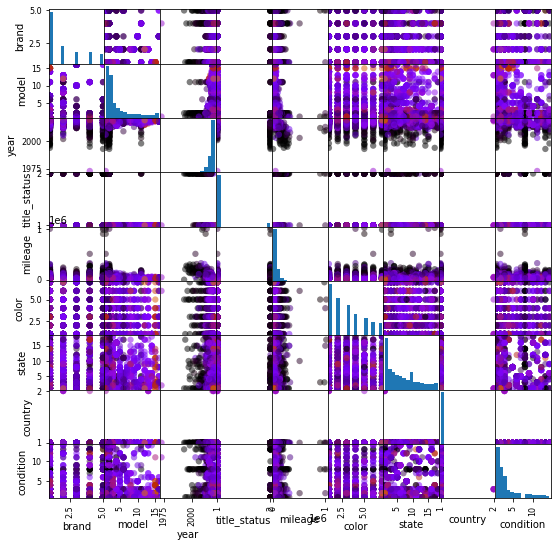

In [105]:
from matplotlib import cm
X = df1[['brand', 'model', 'year', 'title_status', 'mileage', 'color', 'state', 'country', 'condition']]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [135]:
logreg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X)

In [137]:
len(y_pred)

2499

In [138]:
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.01800720288115246


In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 300)

In [143]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=300, p=2,
                     weights='uniform')

In [144]:
knn.score(X_test, y_test)

0.0224